In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# 09. 交流数据
本章的目标是让你能够以清晰易懂、有条理的方式向其他人展示分析结果。无论对方是不是数据专家，都能够理解和使用你的分析结果。

## 9.1 为什么交流数据很重要
在数据科学实战中，能够用程序语言处理数据、做实验还远远不够。数据科学的分析结果只有被真正使用之后才能产生价值。

通常来讲，有两种展示分析结果的方式：语言交流和可视化。语言交流和可视化又可以细分到多个子类，比如幻灯片、图表、期刊，甚至大学讲座。通过掌握数据展示的核心要素，我们每个人都可以拥有清晰、有效的交流技能。

## 9.2 识别有效和无效的可视化
可视化的目的是帮助读者快速理解数据，比如趋势、相关性等。理想情况下，读者应该能在5～6秒之内完成一张可视化图表的分析。

本章重点介绍以下5类基本图表：
+ 散点图
+ 折线图
+ 条形图
+ 直方图
+ 箱形图

### 9.2.1 散点图
`散点图`(scatter plots)是最容易制作的图形之一，它有两个数轴，每个数据点表示一个观测对象。散点图能体现变量间的相关性，适用于具有高相关性的变量。

比如，假设我们有两个变量：平均每天看电视的时长和工作表现(0表示很差，100表示卓越)。我们想找出看电视时长和工作表现之间的关系。

以下代码模拟了一次调查问卷，生成了被访问者平均每天看电视的时长和工作表现得分：

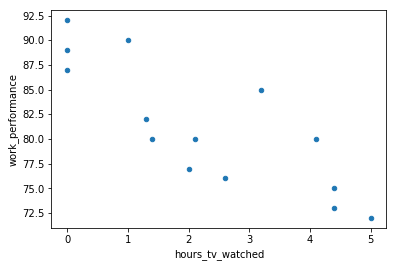

In [2]:
hours_tv_watched = [0, 0, 0, 1, 1.3, 1.4, 2, 2.1, 2.6, 3.2, 4.1, 4.4, 4.4, 5]
work_performance = [87, 89, 92, 90, 82, 80, 77, 80, 76, 85, 80, 75, 73, 72]

df = pd.DataFrame({'hours_tv_watched':hours_tv_watched, 'work_performance':work_performance})
df.plot(x='hours_tv_watched', y='work_performance', kind='scatter')

散点图中的每个点表示一个观测对象，点的位置是观测对象在每个变量上所处的相对位置。从图中可以观察出变量间的关系：平均每天看电视时间越长，工作表现越差。

通过前两章的学习，你已经精通统计学，非常清楚以上两个变量间的关系并不是因果关系。实际上，大部分时候散点图仅仅体现的是变量的相关性，而不是因果关系。只有借助更高级的统计学，比如`第8章`介绍的一些方法，我们才可以确定变量间的因果关系。在接下来的章节，我们会看到由于盲目相信相关性而得出错误的分析结果。

### 9.2.2 折线图
`折线图`(line graphs)用线连接数据点，横轴通常是时间。折线图是展示变量随时间变化的最好方式之一。折线图和散点图一样，适用于定量类型的变量。

例如，有人想找出电视节目《X-Files》和美国境内目击UFO数量间的关系。他收集了每年目击UFO的数量，做了一张趋势图。接着，他在图中进行了标记，确保读者能够明显看出《X-Files》节目播出后的影响。

从图中可以明显看出，自1993年《X-Files》节目播出之后，各地目击UFO的数量急剧攀升：

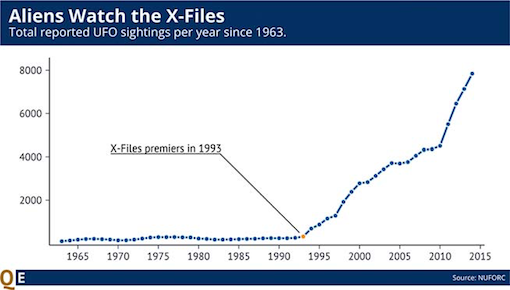

我们被告知每个轴的含义，并能够明显看出变化趋势，明白作者表达的目的—UFO 目击数量和《X-Files》节目的关系。虽然这个例子非常简单，却是展示折 线图作用的最佳案例之一。

### 9.2.3 条形图
`条形图`(bar charts)用于对比不同的数据组。比如，我们可以用条形图对比各大洲的国家/地区数量。需要注意，在条形图中，$x$轴不再是定量变量，而(通常)是分类变量，$y$轴则依然是定量变量。

下面代码使用世界卫生组织酒精消耗量数据绘制各大洲国家/地区数量的条形图：

In [3]:
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


Text(0, 0.5, 'Count')

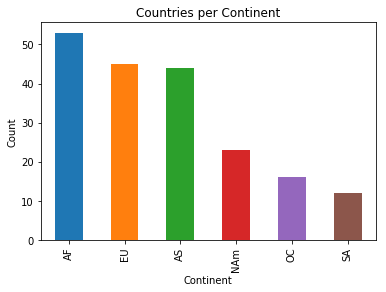

In [4]:
drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')

plt.xlabel('Continent') 
plt.ylabel('Count') 

图中每个柱子的下面有洲名的缩写，柱子的高度表示该大洲的国家/地区数量。我们可以很明显地看出非洲(AF)所含的国家/地区数量最多，南美洲(SA)所含国家/地区数量最少。

我们还可以用条形图对比各大洲人均酒精消耗量：

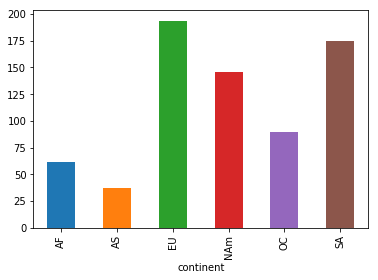

In [5]:
drinks.groupby('continent').beer_servings.mean().plot(kind='bar')

散点图和折线图都不适合分析本节的数据，因为只有定量变量才能用散点图和折线图。条形图擅长展示分类数据的关系。

和折线图类似，我们也可以用条形图表示变量随时间变化的趋势。

### 9.2.4 直方图
`直方图`(histogram)通常用来表示定量变量被拆分为等距`数据桶`(bin)后的频率分布，柱子的高度表示数据桶含有的元素数量。直方图看起来非常像条形图，它的$x$轴表示数据桶，$y$轴表示数量。

我们导入某连锁商店的客户数据：

In [6]:
rossmann_sales = pd.read_csv('data/rossmann.csv.zip') 
rossmann_sales.head()

/home/alex/3rd/py-venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


数据中含有多家店铺，我们只提取第1家店铺的数据：

Text(0, 0.5, 'Count')

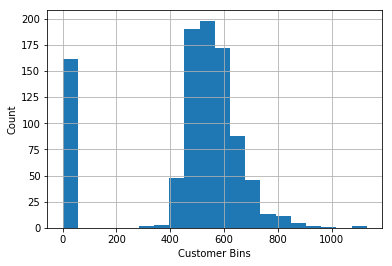

In [7]:
first_rossmann_sales = rossmann_sales[rossmann_sales['Store']==1]
first_rossmann_sales['Customers'].hist(bins=20) 
plt.xlabel('Customer Bins') 
plt.ylabel('Count') 

$x$轴是类别，每个类别表示一个数值区间，比如客户数介于`600～620`的区间。$y$轴和条形图类似，是每个类别对应的观测对象数量。从图中可以看出，大多数时候，每天的客户数介于`500～700`。

### 9.2.5箱形图
`箱形图`(box plots)通常用于表示变量值的分布情况。制作箱形图需要计算以下5个指标：
+ 最小值
+ 第1个四分位
+ 中位数
+ 第3个四分位
+ 最大值

在Pandas中，箱形图中的绿线表示中位数，箱子最上面和最下面的线分别是第3个四分位和第1个四分位。下图是用各大洲啤酒消耗量数据制作的箱形图：

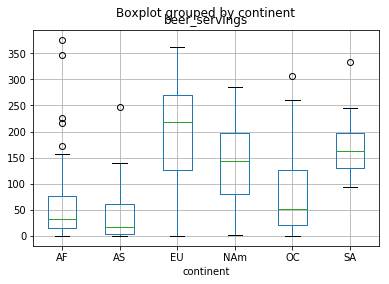

In [8]:
drinks.boxplot(column='beer_servings', by='continent')

对比七大洲的啤酒消耗量和它们的分布情况可以发现：非洲(AF)和亚洲(AS)的啤酒消耗量中位数低于欧洲(EU)和北美(NA)。

箱形图的另一种用途是发现离群值，它比直方图还要直观，因为箱形图包含了最大值和最小值。

回到上一节直方图使用的客户数据，我们用同样的用户数据绘制箱形图：

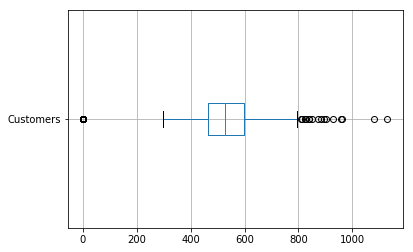

In [9]:
first_rossmann_sales.boxplot(column='Customers', vert=False)

对比直方图和箱形图，它们的$x$轴都是`0～1200`的区间。箱形图中的绿线可以让我们更快地找出数据的中心，直方图则能更好地展示数据的分布情况，以及用户数最高的数据桶。比如，直方图显示数据桶0的高度较高，意味着在过去的150天中，有很多天没有客户光顾。

可以使用Pandas的`describe`方法得到和箱形图一样的数据：

In [10]:
first_rossmann_sales['Customers'].describe()

count     942.000000
mean      467.646497
std       228.930850
min         0.000000
25%       463.000000
50%       529.000000
75%       598.750000
max      1130.000000
Name: Customers, dtype: float64

## 9.3 当图表和统计在说谎
统计不会说谎，人会说谎。一种欺骗观众最简单的方法是混淆相关性和因果关系。

### 9.3.1 相关性 vs. 因果关系
在没有对相关性和因果关系做深入研究之前，我不会在本书谈论这部分内容。本节我们继续使用平均每天看电视时长和工作表现数据。

`相关性`(correlation)是介于`−1～1`的定量指标，它用于衡量两个变量之间的相关性。如果变量的相关性接近`-1`，意味着一个变量增加，另一个变量减少；如果变量的相关性接近`1`，则意味着两个变量同时增加或减少。

`因果关系`(causation)是一个变量影响另一个变量的定性指标。

对于变量`平均每天看电视时长`和变量`工作表现`，可以认为它们呈负相关，即平均每天看电视时间越长，工作表现得分越低：

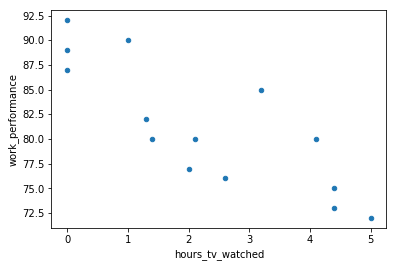

In [11]:
hours_tv_watched = [0, 0, 0, 1, 1.3, 1.4, 2, 2.1, 2.6, 3.2, 4.1, 4.4, 4.4, 5]
work_performance = [87, 89, 92, 90, 82, 80, 77, 80, 76, 85, 80, 75, 73, 72]

df = pd.DataFrame({'hours_tv_watched':hours_tv_watched, 'work_performance':work_performance})
df.plot(x='hours_tv_watched', y='work_performance', kind='scatter')

从散点图可以明显地看出下跌趋势。然而，相关系数才是表示变量间相关性的最好方式，它能够量化变量的相关性和强度：

In [12]:
df.corr()

,hours_tv_watched,work_performance
hours_tv_watched,1.000000,-0.824753
work_performance,-0.824753,1.000000


本例中相关性系数等于`-0.824`，这支撑了我们观察图形得出的结果，即平均每天看电视时长和工作表现呈负相关，且相关性非常强烈。

无论再怎么强调相关性不等价于因果关系也不为过。相关性仅仅用于量化指标间的关系，因果关系则是一个变量决定或影响了另一个变量。

很多时候两个变量具有相关性，并不意味着存在因果关系，原因有很多种，如下所示：
+ 变量之间存在`混淆因子`(confounding factor)，即存在第3个隐蔽的变量将另外两个变量连接起来。比如在之前的案例中，我们发现随着看电视时间增加，工作表现将下降，两个变量呈负相关关系。但这并不意味着看电视是导致工作表现下降的根本原因。也许存在第3个因素，比如看电视时间过长导致睡眠时间减少，睡眠减少导致工作表现下降。睡眠时间就是混淆因子
+ 变量之间也许不存在任何因果关系，仅仅是巧合！实际上，有很多变量存在相关性，但其实它们并不存在任何关系。如图9.13所示，两个变量看起来有非常强的正相关性，如果我们因此得出奶酪的消费量决定了工程学博士的数量这个分析结论，显然是荒谬的

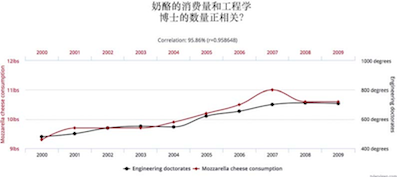

上图解释了为什么数据科学家必须牢记相关性不等价于因果关系。变量存在数学上的相关性，并不意味着它们能够互相影响对方。变量之间可能存在混淆因子，也可能没有任何关系。

### 9.3.2 辛普森悖论
`辛普森悖论`(simpson’s paradox)是另一个我们需要仔细考虑混淆因子的原因。`辛普森悖论`指变量之间的相关性会随参与考虑的因素的变化而发生根本性的变化。这意味着即便图表显示变量间存在正相关性，当加入新的因子(通常是混淆因子)后，变量之间可能就不存在相关性了。辛普森悖论给统计学带来了很多麻烦。

例如`第7章`的网页`A/B测试`案例，对于网页A和网页B，我们希望对比它们的转化率。假设之前`A/B测试`的结果如表所示：
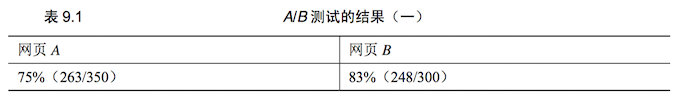

以上数据显示，网页B的转化率高于网页A，因此很容易得出结论：网页B是最好的商业选择。如果我们将以上数据和结论分享给同事将很有说服力。

然而，如果我们将用户的地理位置因素考虑进来，得到的`A/B测试`结果如下：
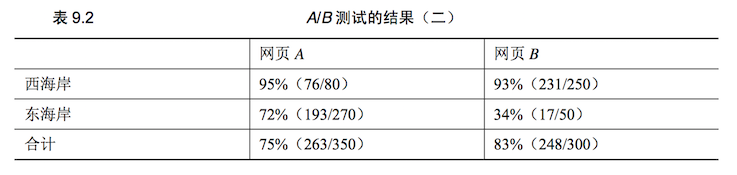

网页A在各个区域的转化率都比网页B好，但网页A的总体转化率却比网页B差，出现了悖论！这正是辛普森悖论美丽且让人震惊的地方。

**辛普森悖论出现的原因是不均等的分类**。网页A/东海岸组合(270)和网页B/西海岸组合(250)所含的样本数量很大，导致最终的测试结果被扭曲，出现意想不到的情况。

> 虽然有解决辛普森悖论的方法，但证明该方法需要使用更复杂的贝叶斯网络，这超出了本书的介绍范围。

辛普森悖论的最大意义是告诫我们从变量的相关性中推导因果关系时要谨慎，要考虑混淆因子。如果你已经发现了变量的相关性，最好试着从中分离出更多的变量，也许这些新变量才是产生相关性的根本原因，或者至少它们能让你更深入地分析问题。

### 9.3.3 如果相关性不等于因果关系，那什么导致了因果关系
数据科学家经常面对已经找出了变量的相关性，但却不是因果关系的情况，这非常令人沮丧。但是，确定因果关系最好的方式是不断地实验，比如运用`第8章`高级统计学介绍的方法。我们必须通过将总体拆分为多个随机样本，并进行各种假设检验，才能确信变量间是否真的存在因果关系。

## 9.4 语言交流
`语言交流`(verbal communication)和数据可视化展示数据一样重要。如果你的工作不仅仅是上传或发表分析结果，那么你需要将结果展示给一屋子的数据科学家、高级管理人员或者报告厅的听众。

无论沟通对象是谁，通过语言交流展示研究成果时都有一些需要特别注意的关键事项。通常来说，存在两种场景的语言交流：一种是正式、专业的场景，比如在公司办公室，你的研究结果关系到公司核心经营指标(KPI)；另一种是非正式场景，比如和办公室同事在一起，你需要让对方关注到你对工作的想法。

### 9.4.1 关键在于讲故事
无论是正式交流还是非正式交流，核心在于讲故事。当你在交流结果时，你的目的是让听众相信并关注你在讲什么。

你要始终关注你的听众，观察他们的反应，以及他们是否对你讲的内容感兴趣。如果听众的参与度降低，试着将问题和他们联系在一起：“试想，当风靡的电视剧《Game of Thrones》回归之后，你的雇员将花大量的时间追剧，因此他们的工作表现将出现下滑。”

然后你就能吸引他们的关注。记住，无论听众是你的老板还是妈妈的朋友，你都必须找到和他们发生联系的方法。

### 9.4.2 正式场合的注意事项
当需要在正式场合将数据分析结果展示给听众时，我想强调以下6个步骤：
1. **总结问题的现状**。在这一步中，我们仔细分析问题的现状，包括问题是什么，如何引起团队的注意
2. **定义问题的本质**。我们对问题进行更深入的分析，包括问题产生的影响、解决方案、如何改变这种情况和已经完成的工作等
3. **透露初始假设**。在开始解决问题之前，阐明我们的初始想法。这一步看起来是新手才需要做的内容，但实际上，这是站在公司/全局角度，而不是从自己角度看待问题的好机会。比如，“根据我们的调查，61%的公司雇员认为看电视的时间长短和工作表现没有关系。”
4. **介绍你的解决方案，或者解决问题的工具**。你如何解决问题，使用了哪些统计检验方法，以及在解决问题过程中使用的任何假设
5. **介绍解决方案能够带来的影响或价值**。对比你的解决方案和初始假设的区别，介绍在未来能够带来哪些影响或价值、如何采取行动提升公司或个人的表现
6. **未来行动方案**。介绍未来可以采取的行动，比如如何实施解决方案

通过以上6个步骤，我们可以分享任何数据科学方法。交流分析结果的最终目的是采取行动。如果你希望解决方案能够被付诸行动，你就必须有清晰的实施路线图，列出未来行动的关键步骤。

## 9.5 为什么演示、如何演示和演示策略
在非正式场合，想清楚为什么演示、如何演示和演示策略是成功的必备条件。掌握它非常简单：
1. 在真正介绍你的方法之前，告诉听众为什么这个问题很重要
2. 接着，介绍你如何解决了这个问题，比如使用了哪些数据清洗步骤、数据挖掘模型和假设检验方法等
3. 最后，介绍你的解决方案对他们有何价值

以上步骤来自知名的广告界。他们不会在广告的前3秒告诉你产品是什么，他们要吸引观众的注意力，在关键时刻亮出产品最令人激动的点。比如：
“大家好，今天我想和大家讨论为什么在奥林匹克运动会举办时，大家很难集中精力工作。我们通过对员工调查问卷结果和工作表现数据进行合并分析，找出了平均每天看电视时长和工作表现之间的关系。分析结果显示，我们应当保持良好的看电视习惯，确保不影响我们的工作。谢谢。”

事实上，本章正是按照这个结构排列的！我们首先从为什么需要关注交流数据开始，然后讨论了如何可视化交流数据，最后介绍为什么演示、如何演示和演示策略。

## 9.6 总结
我们在本章中介绍了常用的图表，如何识别错误的因果关系，以及如何提升语言交流的技能。交流数据不是一个轻松的工作。理解数据科学使用的数学原理是一码事，尝试说服其他数据科学家和非数据科学家，让他们相信你的结果是有价值的另一码事。

在前面的几章中，我们分别讨论了如何获取数据、清洗数据、通过数据可视化让听众更容易理解分析结果。我们还介绍了基本和高级的概率论及统计学，以便使用量化理论分析数据，得到可信赖的分析结果。

在接下来的章节中，我们将讨论数据科学中更大的话题—机器学习和非机器学习。我们将介绍机器学习和机器学习适用的和不适用的场景。在学习过程中，我建议读者保持开放的心态，不仅要掌握机器学习的工作原理，还要理解为什么需要使用机器学习。